# <span style='font-family:Georgia'>Telecommunication customers churn prediction

<span style='font-family:Georgia'>The data was sourced from UCI data repository.

<span style='font-family:Georgia'>The data attributes, target and their descriptions are listed below;

### <span style='font-family:Georgia'>Attributes

<span style='font-family:Georgia'>- accountlength: A numeric vector<br>
<span style='font-family:Georgia'>- internationalplan: A feature with levels no or yes <br>
<span style='font-family:Georgia'>- voicemailplan: A feature with no or yes<br>
<span style='font-family:Georgia'>- numbervmailmessages: A numeric vector<br>
<span style='font-family:Georgia'>- totaldayminutes: A numeric vector<br>
<span style='font-family:Georgia'>- totaldaycalls: A numeric vector<br>
<span style='font-family:Georgia'>- totaldaycharge: A numeric vector<br>
<span style='font-family:Georgia'>- totaleveminutes: A numeric vector<br>
<span style='font-family:Georgia'>- totalevecalls: A numeric vector<br>
<span style='font-family:Georgia'>- totalnightminutes: A numeric vector<br>
<span style='font-family:Georgia'>- totalnightcalls: A numeric vector<br>
<span style='font-family:Georgia'>- totalnightcharge: A numeric vector<br>
<span style='font-family:Georgia'>- totalintlminutes: A numeric vector<br>
<span style='font-family:Georgia'>- totalintlcalls: A numeric vector<br>
<span style='font-family:Georgia'>- totalintlcharge: A numeric vector<br>
<span style='font-family:Georgia'>- numbercustomerservicecalls: A numeric vector<br>


### <span style='font-family:Georgia'>Target

<span style='font-family:Georgia'>- churn: Class variable yes or no

## <span style='font-family:Georgia'>Project goal

<span style='font-family:Georgia'>We aim to build an ML model to predict customer churn. 
Being able to predict customers churn is important for the company. They could proactively act by coming up with customer retention schemes for their remaining customers and request for feedback from those leaving in order to be able to develop strategies to appease them. This is needed as it costs less to retain existing customers than to win new ones. 

<span style='font-family:Georgia'>Framing the problem: As the data contains the label(churn) to be predicted and the label has discrete variables (yes or no), 
this is a supervised machine learning problem and classification models will be explored.

# Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



In [2]:
# Load the dataset
dataset = pd.read_csv(os.path.join('datasets', 'Telecom_customer_churn.csv'))

In [3]:
dataset.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [4]:
# Get the dataset number of rows and columns
dataset.shape

(5000, 18)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
churn                         5000 non-null object
accountlength                 5000 non-null int64
internationalplan             5000 non-null object
voicemailplan                 5000 non-null object
numbervmailmessages           5000 non-null int64
totaldayminutes               5000 non-null float64
totaldaycalls                 5000 non-null int64
totaldaycharge                5000 non-null float64
totaleveminutes               5000 non-null float64
totalevecalls                 5000 non-null int64
totalevecharge                5000 non-null float64
totalnightminutes             5000 non-null float64
totalnightcalls               5000 non-null int64
totalnightcharge              5000 non-null float64
totalintlminutes              5000 non-null float64
totalintlcalls                5000 non-null int64
totalintlcharge               5000 non-null float64
numbercustomerservicecal

<span style='font-family:Georgia'>All the features are numerical variables except 'internationalplan', 'voicemailplan' and the target 'churn' which are categorical text attributes.
They have to be tranformed to numerical values for our model.
Moreso, our dataset has no missing values.

In [7]:
# Check the number of customers with international plan
dataset['internationalplan'].value_counts()

no     4527
yes     473
Name: internationalplan, dtype: int64

In [8]:
# Check the number of customers with voicemail plan
dataset['voicemailplan'].value_counts()

no     3677
yes    1323
Name: voicemailplan, dtype: int64

In [9]:
# Check the number of customers lost
dataset['churn'].value_counts()

No     4293
Yes     707
Name: churn, dtype: int64

In [10]:
# Transform the textual features to numerical values. 1 for 'yes', 0 for 'no'
dataset['internationalplan'], dataset['voicemailplan'] = [dataset[column].map({'yes': 1, 'no': 0}) for column in ['internationalplan', 'voicemailplan']]
   

In [11]:
# Transform the target variable to numerical values. 1 for 'Yes', 0 for 'No'
dataset['churn'] = dataset['churn'].map({'Yes': 1, 'No': 0})

In [12]:
dataset.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [13]:
# Get statistics of the dataset features
dataset.describe()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.141400,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,0.348469,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,0.000000,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,1.000000,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<span style='font-family:Georgia'>The customers average account length is 100 and a maximum of 243.
On average about 14% of the customer were lost. 
This shows that our dataset has skewed class label i.e there are more customers that stayed than those that left.
This will guide us in selecting a suitable performance metrics for our model. As a result, accuracy metric isn't suitable for model evaluation.  

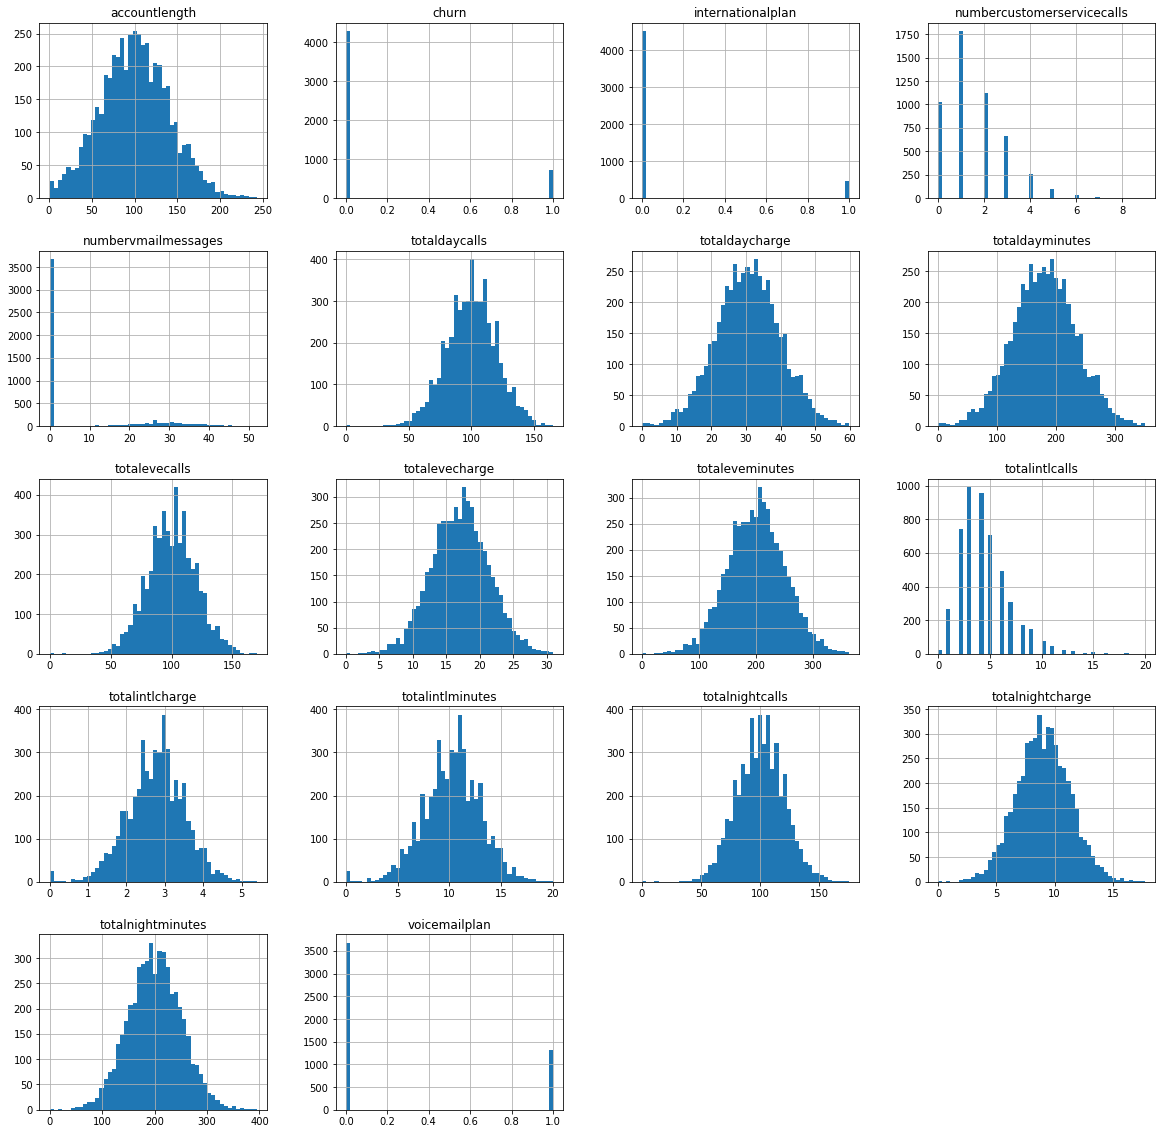

In [14]:
# Plot distribution of each feature values
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 20))
plt.show()


In [15]:
# Correlation between the target 'churn' and other features
corr_matrix = dataset.corr()
corr_matrix['churn'].sort_values(ascending=False)

churn                         1.000000
internationalplan             0.259123
numbercustomerservicecalls    0.212564
totaldayminutes               0.207705
totaldaycharge                0.207700
totaleveminutes               0.089288
totalevecharge                0.089282
totalintlminutes              0.063285
totalintlcharge               0.063275
totalnightminutes             0.045677
totalnightcharge              0.045673
accountlength                 0.021203
totaldaycalls                 0.016130
totalevecalls                -0.006284
totalnightcalls              -0.006986
totalintlcalls               -0.046893
numbervmailmessages          -0.097633
voicemailplan                -0.110698
Name: churn, dtype: float64

In [16]:
# Correlation map with annotation
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
churn,1,0.021,0.26,-0.11,-0.098,0.21,0.016,0.21,0.089,-0.0063,0.089,0.046,-0.007,0.046,0.063,-0.047,0.063,0.21
accountlength,0.021,1,0.015,-0.0066,-0.015,-0.001,0.028,-0.001,-0.0096,0.0091,-0.0096,0.00067,-0.0078,0.00066,0.0013,0.014,0.0013,-0.0014
internationalplan,0.26,0.015,1,0.0091,0.012,0.028,0.0081,0.028,0.021,0.0025,0.021,-0.027,0.0056,-0.027,0.032,0.0045,0.032,-0.013
voicemailplan,-0.11,-0.0066,0.0091,1,0.95,0.0021,-0.0017,0.0021,0.023,-0.0059,0.023,0.0055,0.0092,0.0055,0.0041,-0.0075,0.0042,-0.014
numbervmailmessages,-0.098,-0.015,0.012,0.95,1,0.0054,0.00088,0.0054,0.019,-0.004,0.019,0.0055,0.0027,0.0055,0.0025,0.00012,0.0025,-0.0071
totaldayminutes,0.21,-0.001,0.028,0.0021,0.0054,1,0.0019,1,-0.011,0.0081,-0.011,0.012,0.0042,0.012,-0.019,-0.0013,-0.019,0.0027
totaldaycalls,0.016,0.028,0.0081,-0.0017,0.00088,0.0019,1,0.0019,-0.0007,0.0038,-0.0007,0.0028,-0.0083,0.0028,0.013,0.011,0.013,-0.011
totaldaycharge,0.21,-0.001,0.028,0.0021,0.0054,1,0.0019,1,-0.011,0.0081,-0.011,0.012,0.0042,0.012,-0.019,-0.0013,-0.019,0.0027
totaleveminutes,0.089,-0.0096,0.021,0.023,0.019,-0.011,-0.0007,-0.011,1,0.0028,1,-0.017,0.013,-0.017,0.00014,0.0084,0.00016,-0.014
totalevecalls,-0.0063,0.0091,0.0025,-0.0059,-0.004,0.0081,0.0038,0.0081,0.0028,1,0.0028,0.0018,-0.014,0.0018,-0.0075,0.0056,-0.0075,0.0062


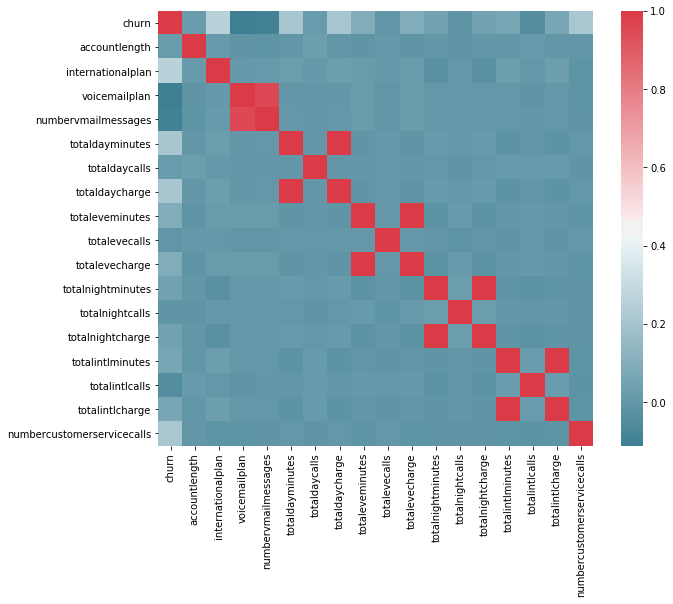

In [17]:
# correlation heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square=True, ax=ax)

#### <span style='font-family:Georgia'>Some interesting observations from our dataset are;

<span style='font-family:Georgia'>The following features internationalplan, numbercustomerservicecalls, totaldayminutes, totaldaycharge have higher positive correlation than the others. 
Some features are correlated with each other
* <span style='font-family:Georgia'>voicemailplan is highly correlated with numbervmailmessages
* <span style='font-family:Georgia'>totaldayminutes is highly correlated with totaldaycharge
* <span style='font-family:Georgia'>totaleveminutes is highly correlated with totalevecharge
* <span style='font-family:Georgia'>totalnightminutes is highly correlated with totalnightcharge
* <span style='font-family:Georgia'>totalintlminutes is highly correlated with totalintlcharge




# <span style='font-family:Georgia'>Data partitioning

In [18]:
# Adopt 80:20 split ratio for training and testing. 
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42 )

In [19]:
train.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
4227,0,119,0,0,0,73.7,66,12.53,160.5,132,13.64,214.2,67,9.64,13.0,6,3.51,3
4676,1,200,1,1,29,92.2,95,15.67,200.0,101,17.00,119.1,99,5.36,5.7,1,1.54,1
800,0,96,0,1,27,261.3,96,44.42,220.9,101,18.78,179.4,97,8.07,11.3,2,3.05,1
3671,0,141,0,0,0,138.2,94,23.49,176.4,84,14.99,182.9,110,8.23,11.1,6,3.00,3
4193,0,136,0,0,0,132.4,110,22.51,254.1,81,21.60,176.5,100,7.94,13.0,6,3.51,2


In [20]:
train.shape

(4000, 18)

In [21]:
# re-index the training set
train.index = range(len(train))

In [22]:
# target class label
train_y = train['churn']

In [23]:
# Features
train_X = train.drop('churn', axis=1)

# <span style='font-family:Georgia'>Model development

In [59]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import f1_score

In [25]:
# Instantiate a logistic regression model and train it on the training set
log_clf = LogisticRegression(random_state=42)

log_clf.fit(train_X, train_y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# Obtain predictions made on 3folds
y_train_pred_log = cross_val_predict(log_clf, train_X, train_y, cv=3)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
y_train_pred_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
# Function to compute precision, recall, true positive, true negative, false positive and false negative
def eval_pred(target, pred, model):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i, j in zip(target, pred):
        if i == 1 and j == 1:
            tp += 1
        elif i == 1 and j == 0:
            fn += 1
        elif i == 0 and j == 1:
            fp += 1
        elif i == 0 and j == 0:
            tn += 1
        else:
            pass
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print(f'{model} model has:\nprecision: {np.round(precision, 2)}\nrecall:{np.round(recall, 2)}')
    print(f'TP: {tp}\nFN:{fn}\nFP:{fp}\nTN:{tn}')
    return tp, fn, fp, tn 

In [29]:
eval_pred(train_y, y_train_pred_log, 'log_clf')

log_clf model has:
precision: 0.55
recall:0.17
TP: 99
FN:469
FP:81
TN:3351


(99, 469, 81, 3351)

In [30]:
# As 14% of the customer churn, the target is skewed. therefore, accuracy isn't a suitable metrics for evaluating our model.
# f1 score is computed to give the weighted average of precision and recall. It will be used to compare different models
log_f1_score = np.round(f1_score(train_y, y_train_pred_log), 2)
log_f1_score

0.26

In [31]:
# evaluate model performance with cross-validation
# Obtain the decision scores of the samples in the training set
scores_log = cross_val_predict(log_clf, train_X, train_y, cv=3,
                              method='decision_function')

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
# Compute logistic regression ROC AUC score
log_roc_auc_score = np.round(roc_auc_score(train_y, scores_log), 2)
log_roc_auc_score

0.82

In [33]:
# Instantiate random forest model and fit it to the training set
forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(train_X, train_y)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [34]:
# Obtain random forest classifier predictions on 3folds
y_train_pred_forest = cross_val_predict(forest_clf, train_X, train_y, cv=3)

In [35]:
# compute random forest precision and recall score
eval_pred(train_y, y_train_pred_forest, 'forest_clf')

forest_clf model has:
precision: 0.94
recall:0.65
TP: 370
FN:198
FP:23
TN:3409


(370, 198, 23, 3409)

In [36]:
# f1 score for random forest classifier
forest_f1_score = np.round(f1_score(train_y, y_train_pred_forest), 2)
forest_f1_score

0.77

In [37]:
# Compute the probability of an instance belonging to a class i.e either 0 or 1 and retrieve the positive class probabilities
scores_forest = cross_val_predict(forest_clf, train_X, train_y, cv=3,
                                 method='predict_proba')[:, 1]

In [38]:
# Compute the ROC AUC score for random forest classifier
forest_roc_auc_score = np.round(roc_auc_score(train_y, scores_forest), 2)
forest_roc_auc_score

0.91

In [39]:
# Instantiate xgboost model and fit it to the training set
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
# Obtain the predictions of xgboost
y_train_pred_xgb = cross_val_predict(xgb_clf, train_X, train_y, cv=3)

In [42]:
# Calculate f1 score for xgboost model
xgb_f1_score = f1_score(train_y, y_train_pred_xgb)

In [43]:
xgb_f1_score

0.8071216617210681

In [44]:
# Obtain prediction scores of xgboost model
probas_xgb = cross_val_predict(xgb_clf, train_X, train_y, cv=3, method='predict_proba')
scores_xgb = probas_xgb[:, 1]

In [45]:
# Compute the ROC AUC score of xgboost
xgb_roc_auc_score = np.round(roc_auc_score(train_y, scores_xgb), 2)

In [46]:
xgb_roc_auc_score

0.92

In [47]:
tp,fn,fp,tn = eval_pred(train_y, y_train_pred_xgb, 'xgb_clf')

xgb_clf model has:
precision: 0.92
recall:0.72
TP: 408
FN:160
FP:35
TN:3397


# <span style='font-family:Georgia'>Model performance comparison

In [48]:
model_result = {'f1_score': [log_f1_score, forest_f1_score, xgb_f1_score],
               'roc_auc_score': [log_roc_auc_score, forest_roc_auc_score, xgb_roc_auc_score]
               }


In [49]:
index = ['Logistic regression', 'Random forest classifier', 'XGBoost classifier']

In [50]:
result_comparison = pd.DataFrame(model_result, index=index)
result_comparison

,f1_score,roc_auc_score
Logistic regression,0.260000,0.82
Random forest classifier,0.770000,0.91
XGBoost classifier,0.807122,0.92


# <span style='font-family:Georgia'> Feature engineering

<span style='font-family:Georgia'>The process will yield features to improve the predictive power of our model

In [51]:
# create feature 'totalcharge' to replace all the charges
train_X['totalcharge'] = train_X['totaldaycharge'] + train_X['totalevecharge'] + train_X['totalnightcharge'] + train_X['totalintlcharge']

In [52]:
train_X.drop(['totaldaycharge','totalevecharge','totalnightcharge','totalintlcharge'], axis=1, inplace=True)

In [53]:
train_X.head()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,totalcharge
0,119,0,0,0,73.7,66,160.5,132,214.2,67,13.0,6,3,39.32
1,200,1,1,29,92.2,95,200.0,101,119.1,99,5.7,1,1,39.57
2,96,0,1,27,261.3,96,220.9,101,179.4,97,11.3,2,1,74.32
3,141,0,0,0,138.2,94,176.4,84,182.9,110,11.1,6,3,49.71
4,136,0,0,0,132.4,110,254.1,81,176.5,100,13.0,6,2,55.56


In [54]:
xgb_clf.fit(train_X, train_y)
y_train_pred_xgb_mod = cross_val_predict(xgb_clf, train_X, train_y, cv=3)

In [55]:
xgb_f1_score_mod = np.round(f1_score(train_y, y_train_pred_xgb_mod), 2)
xgb_f1_score_mod

0.92

In [56]:
probas_xgb_mod = cross_val_predict(xgb_clf, train_X, train_y, cv=3, method='predict_proba')
scores_xgb_mod = probas_xgb_mod[:, 1]

In [57]:
xgb_roc_auc_score_mod = np.round(roc_auc_score(train_y, scores_xgb_mod), 2)
xgb_roc_auc_score_mod

0.92

In [60]:
accuracy_score(train_y, y_train_pred_xgb_mod)

0.979

In [61]:
tp,fn,fp,tn = eval_pred(train_y, y_train_pred_xgb_mod, 'xgb_clf')

xgb_clf model has:
precision: 0.99
recall:0.86
TP: 487
FN:81
FP:3
TN:3429


In [77]:
train_X.head()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,totalcharge
0,119,0,0,0,73.7,66,160.5,132,214.2,67,13.0,6,3,39.32
1,200,1,1,29,92.2,95,200.0,101,119.1,99,5.7,1,1,39.57
2,96,0,1,27,261.3,96,220.9,101,179.4,97,11.3,2,1,74.32
3,141,0,0,0,138.2,94,176.4,84,182.9,110,11.1,6,3,49.71
4,136,0,0,0,132.4,110,254.1,81,176.5,100,13.0,6,2,55.56


<span style='font-family:Georgia'> Cool! The feature engineering process improved our precision score by 7.6% (from 92% to 99%) and recall score was also increased by 19.4% (from 72% to 86%), this led to a 13.6% increase in f1_score (from 81% to 92%). 

In [ ]:
Performance evaluation on the test set

In [62]:
test.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1501,0,72,0,0,0,272.4,88,46.31,107.9,125,9.17,185.5,81,8.35,12.7,2,3.43,0
2586,0,53,0,0,0,164.1,106,27.90,206.0,56,17.51,194.7,124,8.76,11.4,2,3.08,1
2653,0,155,0,1,30,61.6,103,10.47,255.1,110,21.68,225.9,96,10.17,12.4,5,3.35,1
1055,0,161,0,0,0,178.1,109,30.28,146.5,86,12.45,137.6,78,6.19,8.5,2,2.30,1
705,0,99,0,0,0,62.9,81,10.69,231.0,64,19.64,168.9,121,7.60,8.5,5,2.30,1


In [63]:
test_X = test.drop('churn', axis=1)

In [64]:
# create feature 'totalcharge' to repalce all the charges
test_X['totalcharge'] = test_X['totaldaycharge'] + test_X['totalevecharge'] + test_X['totalnightcharge'] + test_X['totalintlcharge']

In [65]:
test_X.drop(['totaldaycharge','totalevecharge','totalnightcharge','totalintlcharge'], axis=1, inplace=True)

In [66]:
test_X.head()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,totalcharge
1501,72,0,0,0,272.4,88,107.9,125,185.5,81,12.7,2,0,67.26
2586,53,0,0,0,164.1,106,206.0,56,194.7,124,11.4,2,1,57.25
2653,155,0,1,30,61.6,103,255.1,110,225.9,96,12.4,5,1,45.67
1055,161,0,0,0,178.1,109,146.5,86,137.6,78,8.5,2,1,51.22
705,99,0,0,0,62.9,81,231.0,64,168.9,121,8.5,5,1,40.23


In [67]:
test_y = test['churn']

In [68]:
test_X.shape

(1000, 14)

In [69]:
test_X.index = range(test_X.shape[0])

In [70]:
y_test_pred_xgb = xgb_clf.predict(test_X)

In [71]:
accuracy_score(test_y, y_test_pred_xgb)

0.983

In [72]:
f1_score(test_y, y_test_pred_xgb)

0.9348659003831418

In [73]:
#xgb_test_roc_auc_score = roc_auc_score(test_y, xgb_clf.predict_proba(test_X)[:,1])
#xgb_test_roc_auc_score

In [74]:
tp,fn,fp,tn = eval_pred(test_y, y_test_pred_xgb, 'xgb_clf')


xgb_clf model has:
precision: 1.0
recall:0.88
TP: 122
FN:17
FP:0
TN:861


In [75]:
FNR = fn / (fn + tp)
TNR = tn / (tn + fp)
print(f'The model FNR is: {FNR} and TNR is {TNR}')

The model FNR is: 0.1223021582733813 and TNR is 1.0


# <span style='font-family:Georgia'>Summary

<span style='font-family:Georgia'>XGBoost classifier outperformed other models which are Logistic regression and Random forest classifier.ROC AUC score and f1 score were used to evaluate their performance.
XGBoost classifier was then selected as the preferred model to predict customer churn. It performed excellently in predicting customer churn.

<span style='font-family:Georgia'>The final result of XGBoost classifier model on the test set showed that:
- <span style='font-family:Georgia'>It has an excellent accuracy in predicting the positive class (customers that churned). More so, it has a good sensitivity (True Positive Rate or Recall) in predicting customers churn. 
- <span style='font-family:Georgia'>It also has excellent specificity rate (True Negative Rate) i.e it can detect excellently customers that stay. With this information, the company can target their customers retention program to these customers. 
- <span style='font-family:Georgia'>Lastly, it has low False Negative Rate which is desirable as we wouldn't want the model to misclassify customers that churned as those that didn't. 